In [10]:
def trade(start_date,end_date): 
    # Configure plotting in Jupyter
    from matplotlib import pyplot as plt
    %matplotlib inline
    plt.rcParams.update({
        'figure.figsize': (15, 15),
        'axes.spines.right': False,
        'axes.spines.left': False,
        'axes.spines.top': False,
        'axes.spines.bottom': False})
    # Seed random number generator
    from numpy import random as nprand
    seed = hash("Network Science in Python") % 2**32
    nprand.seed(seed)
    import datetime
    import networkx as nx
    import pandas as pd
    from dateutil.relativedelta import relativedelta
    import pymysql
    from sqlalchemy import create_engine
    import numpy as np
    conn=create_engine('mysql+pymysql://root:lv+7)!@@SHZX@localhost:3306/pledge?charset=gbk')
    sql_query = "select * from trading_data where date_format(日切日期,'%%Y/%%m/%%d')>='" + start_date +\
    "'and date_format(日切日期,'%%Y/%%m/%%d')<='" + end_date +"'"
    df = pd.read_sql(sql_query,con=conn)
    start_date = datetime.datetime.strptime(start_date,'%Y/%m/%d')
    end_date = datetime.datetime.strptime(end_date,'%Y/%m/%d')

    G = nx.DiGraph()
    # Load data file into network
    
    # Parse header
    title = list(df.columns)
    date_idx=title.index('日切日期')
    buyer_idx=title.index('正回购方持有人账号')
    buyertype_idx=title.index('正回购方机构类别')
    seller_idx=title.index('逆回购方持有人账号')
    sellertype_idx=title.index('逆回购方机构类别')
    amount_idx=title.index('首期结算金额（亿元）')
    #节点集合
    nodeset=set()
    #机构类别字典的主键和值
    key=[]
    value=[]
    # Parse rows
    for i in range(len(df)):
        trade_date=datetime.datetime.strptime(df.iloc[i,date_idx],'%Y/%m/%d')
        if trade_date>=start_date and trade_date<=end_date:        
            nodeset.add(df.iloc[i,seller_idx])
            nodeset.add(df.iloc[i,buyer_idx])
            key.append(df.iloc[i,seller_idx])
            value.append(df.iloc[i,sellertype_idx])
            key.append(df.iloc[i,buyer_idx])
            value.append(df.iloc[i,buyertype_idx])
    lookup=dict(zip(key,value))
    nodes=sorted(list(nodeset),key=lambda x: lookup[x])
    for n in nodes:
        G.add_node(n)
        G.nodes[n]['type']=lookup[n]
    #生成边
    for i in range(len(df)):
        trade_date=datetime.datetime.strptime(df.iloc[i,date_idx],'%Y/%m/%d')
        if trade_date>=start_date and trade_date<=end_date:       
            try:
                G.edges[df.iloc[i,seller_idx],df.iloc[i,buyer_idx]]['amount'] += float(df.iloc[i,amount_idx])
            except KeyError:
                # Edge doesn't exist, create it
                G.add_edge(df.iloc[i,seller_idx],df.iloc[i,buyer_idx],amount=float(df.iloc[i,amount_idx]))
    #根据机构类别给节点上色
    typelist=['证券公司','城市商业银行','银行理财产品','职业年金','证券投资基金','农商行和农合行','养老基金','证券公司资产管理计划'\
              ,'基金管理公司及其子公司特定客户资产管理计划','财务公司','企业年金','邮政储蓄银行','保险资产管理计划','股份制商业银行'\
              ,'保险产品','社保基金','养老金产品','保险公司','农信社及联社','其他特殊机构','托管人','私募投资基金','信托计划',\
              '保险保障基金','资产管理公司','外资银行分行','其他存款类金融机构','期货公司资产管理产品','国有控股商业银行','期货公司'\
              ,'境外参加银行','投资咨询类公司','外资银行法人','村镇银行','金融租赁公司','信托公司','境外人民币清算行','保险资产管理公司'\
              ,'政策性银行','其他非法人类产品']
    node_color = []
    for n in G.nodes:
        node_color.append(get_color(typelist.index(G.nodes[n]['type'])))
    
#     max_amount = max([G.edges[e]['amount'] for e in G.edges])
    weight=[G.edges[e]['amount'] for e in G.edges]
#     pos=nx.spring_layout(G)
#     nx.draw_networkx_nodes(G, pos=pos, node_color=node_color, with_labels=True)
#     nx.draw_networkx_edges(G, pos=pos,width=3,edge_color=weight,edge_cmap=plt.cm.Blues, alpha=0.5)
#     nx.draw_networkx_labels(G,pos=pos)
    nx.draw_networkx(G,node_size=0,edge_color=weight,edge_cmap=plt.cm.Blues,alpha=0.1)
    plt.show()

In [2]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

           日切日期      录入时间               成交编号              源交易号  清算方式  轧差品种  \
0     2020/3/30  14:04:15  NCR20200330000010  CR20200330005562  净额清算  债券净额   
1     2020/3/30  13:46:07  NCR20200330000009  CR20200330004560  净额清算  债券净额   
2     2020/3/30  13:46:06  NCR20200330000008  CR20200330004555  净额清算  债券净额   
3     2020/3/30  13:43:06  NCR20200330000007  CR20200330004381  净额清算  债券净额   
4     2020/3/30  13:42:45  NCR20200330000006  CR20200330004357  净额清算  债券净额   
5     2020/3/30  11:36:55  NCR20200330000005  CR20200330002841  净额清算  债券净额   
6     2020/3/30  11:33:16  NCR20200330000004  CR20200330002656  净额清算  债券净额   
7     2020/3/30  11:22:35  NCR20200330000003  CR20200330002142  净额清算  债券净额   
8     2020/3/30  11:21:15  NCR20200330000002  CR20200330002064  净额清算  债券净额   
9     2020/3/30  11:17:26  NCR20200330000001  CR20200330001838  净额清算  债券净额   
10    2020/3/30  16:49:00  GCR20200330004916  CR20200330011122  全额结算  None   
11    2020/3/30  16:48:25  GCR20200330004915  CR20200330011120  

2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 

2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 

**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-

2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 

**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-

2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 

2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 

2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 00:00:00
**
2020-03-30 

C:\Users\lvjiaqi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\lvjiaqi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\lvjiaqi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\lvjiaqi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node 

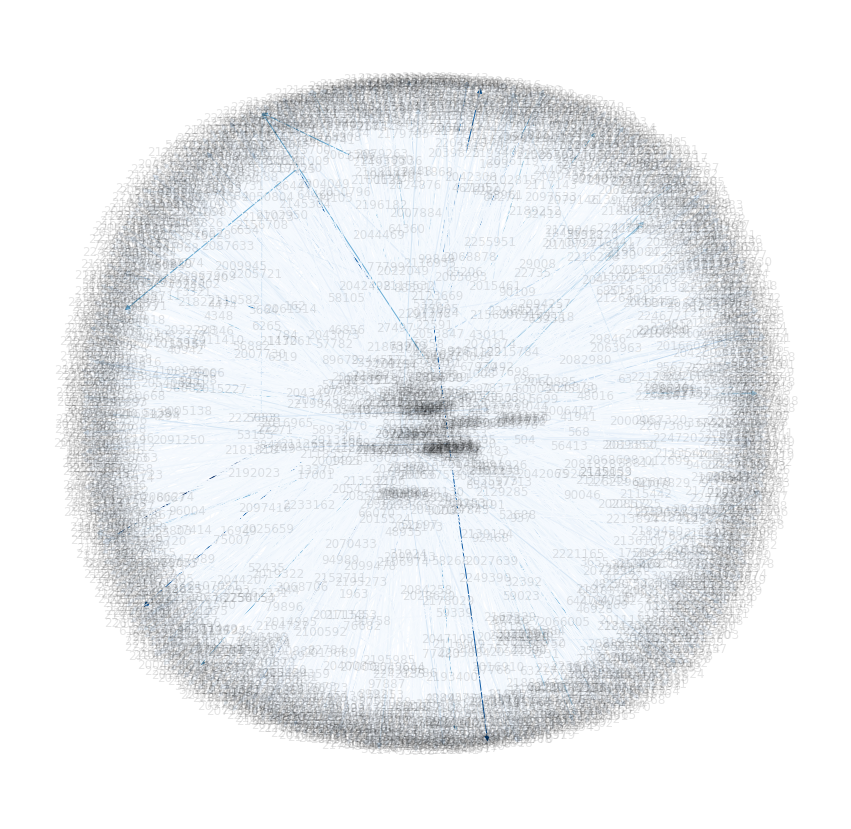

In [11]:
trade("2020/03/30","2020/03/30")